# H0 : weather,temp,season,humidity,and windspeed do NOT have an effect on num of bike rentals

# Ha : they do

In [70]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import datetime as dt

plt.style.use('seaborn')
sns.set(style="white")

In [71]:
df = pd.read_pickle('bike_dataset')

In [72]:
# df.head()

In [73]:
def columnize(df, column, new_vals, new_col):
    list1 = df[column].unique()
    dict1 = dict(zip(list1,new_vals))
    df[new_col] = df[column].map(dict1)
    df = pd.concat([df, pd.get_dummies(df[new_col])], 1)
    return df

In [74]:
#df = columnize(df, 'weathersit', ['clear', 'misty', 'light_storm', 'heavy_storm'],'weather')

In [75]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['dteday'] = df['dteday'].map(dt.datetime.toordinal)

In [76]:
df = df[df.cnt>100]


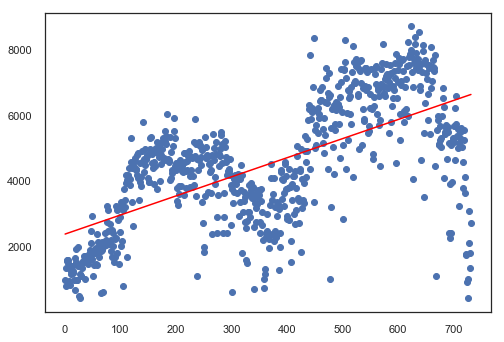

(2380.287482388977, array([[0.        , 5.82680902]]))

In [77]:
x=df.instant.values.reshape(-1,1)
y=df.cnt.values.reshape(-1,1)

# Regression
poly = PolynomialFeatures(degree=1)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

predictions = model.predict(x_poly)

# Plotting
plt.scatter(df['instant'], df['cnt'])
plt.plot(df['instant'],predictions,c='red')
plt.show()

model.intercept_[0], model.coef_


In [78]:
df['trend']= predictions

In [79]:
df['detrend']=df['cnt']-df['trend']

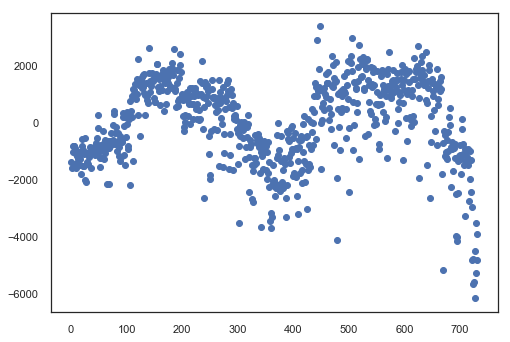

In [80]:
plt.scatter(df['instant'], df['detrend'])


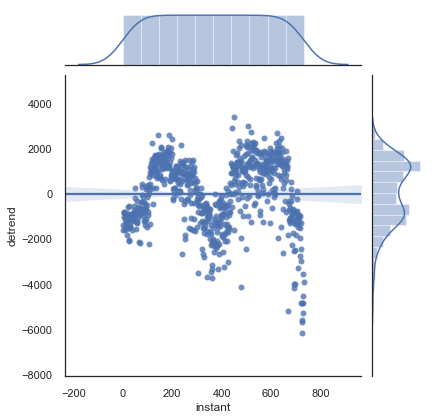

In [81]:
sns.jointplot(x='instant', y='detrend', data=df, kind="reg")

In [82]:
def resid(x,y_actual):
    return (model.intercept_[0]+sum([model.coef_[0][i]*x**i for i in range(len(model.coef_[0]))])) -  y_actual

In [83]:
df['resids'] = resid(df['instant'], df['cnt'])
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,clear,light_storm,misty,fall,spring,summer,winter,trend,detrend,resids
0,1,719163,winter,0,1,0,6,0,2,0.344167,...,1,0,0,0,0,0,1,2386.114291,-1401.114291,1401.114291
1,2,719163,winter,0,1,0,0,0,2,0.363478,...,1,0,0,0,0,0,1,2391.941100,-1590.941100,1590.941100
2,3,719163,winter,0,1,0,1,1,1,0.196364,...,0,0,1,0,0,0,1,2397.767909,-1048.767909,1048.767909
3,4,719163,winter,0,1,0,2,1,1,0.200000,...,0,0,1,0,0,0,1,2403.594718,-841.594718,841.594718
4,5,719163,winter,0,1,0,3,1,1,0.226957,...,0,0,1,0,0,0,1,2409.421527,-809.421527,809.421527
5,6,719163,winter,0,1,0,4,1,1,0.204348,...,0,0,1,0,0,0,1,2415.248337,-809.248337,809.248337
6,7,719163,winter,0,1,0,5,1,2,0.196522,...,1,0,0,0,0,0,1,2421.075146,-911.075146,911.075146
7,8,719163,winter,0,1,0,6,0,2,0.165000,...,1,0,0,0,0,0,1,2426.901955,-1467.901955,1467.901955
8,9,719163,winter,0,1,0,0,0,1,0.138333,...,0,0,1,0,0,0,1,2432.728764,-1610.728764,1610.728764
9,10,719163,winter,0,1,0,1,1,1,0.150833,...,0,0,1,0,0,0,1,2438.555573,-1117.555573,1117.555573


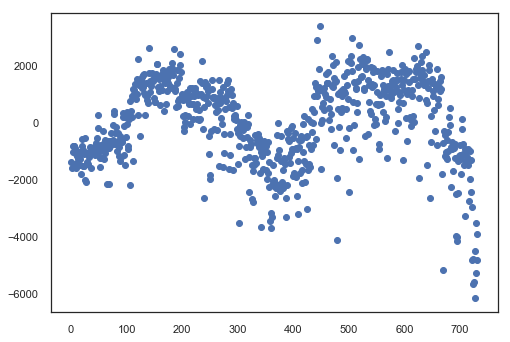

In [84]:
plt.scatter(df['instant'], df['detrend'])
# x = np.linspace(0,730,730)
# y = np.array([0 for i in range(len(x))])
# plt.plot(x,y, c='red')

In [85]:
def checkresiduals(df, target, sm_model):
    # checking for our model - Homoscedasticity,  Independence of residuals
    pred_val = sm_model.fittedvalues.copy()
    true_val = df[target].values.copy()
    residual = true_val - pred_val

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
#     fig, ax = plt.subplots(figsize=(8, 6))
    ax1.hist(residual, density=True, bins=30)
    ax2.scatter(df[target],residual)
    ax2.set_title('Residual Scatterplot')
    plt.show()

In [86]:
df = df.drop('resids',axis=1)

In [87]:
interms = df.copy()

In [88]:
interms = interms.drop(['dteday','season','yr','mnth','weekday','atemp','weathersit','casual','registered','cnt','weather','trend','detrend'],axis=1)

In [89]:
interms.columns

Index(['instant', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'clear',
       'light_storm', 'misty', 'fall', 'spring', 'summer', 'winter'],
      dtype='object')

In [90]:
poly1 = PolynomialFeatures(3)
poly_data = poly1.fit_transform(interms)
poly_columns = poly1.get_feature_names(list(interms.columns))
poly_features = pd.DataFrame(poly_data, columns=poly_columns, index=interms.index)

In [91]:
new_cols = list(poly_features.columns)

In [92]:
poly_features = poly_features.drop([name for name in new_cols if '^' in name],axis=1)

In [93]:
poly_features = poly_features.loc[:, (poly_features != 0).any(axis=0)]

In [94]:
poly_features

,1,instant,holiday,workingday,temp,hum,windspeed,clear,light_storm,misty,...,windspeed clear summer,windspeed clear winter,windspeed light_storm fall,windspeed light_storm spring,windspeed light_storm summer,windspeed light_storm winter,windspeed misty fall,windspeed misty spring,windspeed misty summer,windspeed misty winter
0,1.0,1.0,0.0,0.0,0.344167,0.805833,0.160446,1.0,0.0,0.0,...,0.0,0.160446,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,1.0,2.0,0.0,0.0,0.363478,0.696087,0.248539,1.0,0.0,0.0,...,0.0,0.248539,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,1.0,3.0,0.0,1.0,0.196364,0.437273,0.248309,0.0,0.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.248309
3,1.0,4.0,0.0,1.0,0.200000,0.590435,0.160296,0.0,0.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.160296
4,1.0,5.0,0.0,1.0,0.226957,0.436957,0.186900,0.0,0.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.186900
5,1.0,6.0,0.0,1.0,0.204348,0.518261,0.089565,0.0,0.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.089565
6,1.0,7.0,0.0,1.0,0.196522,0.498696,0.168726,1.0,0.0,0.0,...,0.0,0.168726,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
7,1.0,8.0,0.0,0.0,0.165000,0.535833,0.266804,1.0,0.0,0.0,...,0.0,0.266804,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
8,1.0,9.0,0.0,0.0,0.138333,0.434167,0.361950,0.0,0.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.361950
9,1.0,10.0,0.0,1.0,0.150833,0.482917,0.223267,0.0,0.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.223267


In [95]:
final_df = pd.concat([df, poly_features],axis=1)
final_df = final_df.drop('dteday',axis=1)

In [96]:
final_df.columns = [name.replace(' ','_') for name in final_df.columns]

In [97]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [98]:
final_df= final_df.select_dtypes(exclude=['object'])

In [99]:
final_df = final_df.drop([name for name in list(final_df.columns) if 'instant' in name],axis=1)

In [100]:
final_df = final_df.drop([name for name in list(final_df.columns) if 'winter' in name],axis=1)

In [101]:
final_df = final_df.drop([name for name in list(final_df.columns) if 'light_storm' in name],axis=1)

In [102]:
final_df = final_df.drop([name for name in list(final_df.columns) if 'weekday' in name or 'yr' in name],axis=1)

In [103]:
final_df = final_df.drop([name for name in list(final_df.columns) if 'mnth' in name or 'weathersit' in name or 'atemp' in name],axis=1)

In [104]:
final_df = final_df.drop([name for name in list(final_df.columns) if 'cnt' in name],axis=1)

In [105]:
final_df = final_df.drop([name for name in list(final_df.columns) if 'casual' in name],axis=1)

In [106]:
final_df = final_df.drop([name for name in list(final_df.columns) if 'registered' in name or 'windspeed' in name],axis=1)

In [107]:
workingivs = list(final_df.columns)

In [108]:
workingivs.remove('trend')

In [109]:
workingivs.remove('detrend')

In [110]:
IVs = ''.join(name+'+' for name in workingivs).strip('+')

In [111]:
lr_model = ols(formula=f'detrend~{IVs}', data=final_df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                detrend   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     27.63
Date:                Fri, 23 Aug 2019   Prob (F-statistic):          4.02e-159
Time:                        09:08:49   Log-Likelihood:                -5839.6
No. Observations:                 730   AIC:                         1.184e+04
Df Residuals:                     652   BIC:                         1.219e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2.499e+04   3.02e+04     -0.828      0.408   -8.42e+04    3.42e+04
holiday                  1763.9308   6455.615      0.273      0.785   -1.09e+04    1.44e+04
workingday               1548.6292   1.36e+04      0.114      0.910   -2.52e+04    2.83e+04
temp                     1866.6469   8.68e+04      0.022      0.983   -1.69e+05    1.72e+05
hum                      2.807e+04   4.76e+04      0.590      0.556   -6.54e+04    1.22e+05
clear                    2.519e+04   3.02e+04      0.835      0.404    -3.4e+04    8.44e+04
misty                    2.118e+04   3.01e+04      0.703      0.483    -3.8e+04    8.04e+04
fall                     1.875e+04   3.46e+04      0.541      0.589   -4.93e+04    8.68e+04
spring                  -2647.9723   2.75e+04     -0.096      0.923   -5.66e+04    5.13e+04
summer                   8879.4828   7481.217      1.187      0.236   -5810.703    2.36e+04
holiday_temp             6438.0327   2.23e+04      0.289      0.773   -3.73e+04    5.02e+04
holiday_hum             -3190.7514   1.21e+04     -0.263      0.793    -2.7e+04    2.07e+04
holiday_clear            8864.4110   4318.000      2.053      0.040     385.547    1.73e+04
holiday_misty           -7100.4803   3939.270     -1.802      0.072   -1.48e+04     634.706
holiday_fall             2719.9247   5497.229      0.495      0.621   -8074.483    1.35e+04
holiday_spring           -144.8444   9962.836     -0.015      0.988   -1.97e+04    1.94e+04
holiday_summer            838.6993   1571.733      0.534      0.594   -2247.569    3924.968
workingday_temp         -2.128e+04   5.06e+04     -0.420      0.675   -1.21e+05    7.82e+04
workingday_hum          -2593.7191   8783.654     -0.295      0.768   -1.98e+04    1.47e+04
workingday_clear         -660.4020   1.36e+04     -0.048      0.961   -2.74e+04    2.61e+04
workingday_misty         -364.8768   1.36e+04     -0.027      0.979   -2.71e+04    2.63e+04
workingday_fall           1.09e+04   3630.625      3.001      0.003    3766.689     1.8e+04
workingday_spring        1.487e+04   5393.638      2.757      0.006    4278.684    2.55e+04
workingday_summer       -2901.2303   1723.263     -1.684      0.093   -6285.044     482.584
temp_hum                 8948.3998   1.48e+05      0.060      0.952   -2.83e+05       3e+05
temp_clear              -6400.4743   8.67e+04     -0.074      0.941   -1.77e+05    1.64e+05
temp_misty               5520.6215   8.67e+04      0.064      0.949   -1.65e+05    1.76e+05
temp_fall                3.028e+04    1.2e+04      2.527      0.012    6756.048    5.38e+04
temp_spring              4.601e+04   4.07e+04      1.130      0.259    -3.4e+04    1.26e+05
temp_summer              -1.73e+04   7860.600     -2.200      0.028   -3.27e+04   -1860.809
hum_clear               -3.236e+04   4.76e+04  

In [112]:
ps = pd.DataFrame(lr_model.pvalues, columns=['pvalue'])

In [113]:
ps[ps['pvalue']>.9].transpose().columns

Index(['workingday', 'temp', 'spring', 'holiday_spring', 'workingday_clear',
       'workingday_misty', 'temp_hum', 'temp_clear', 'temp_misty',
       'clear_spring', 'misty_spring', 'holiday_hum_spring',
       'holiday_misty_spring', 'temp_hum_clear', 'temp_hum_misty'],
      dtype='object')

In [114]:
def refine_model(model, old_ivs, pval):
    pdf = pd.DataFrame(model.pvalues, columns=['pvalue'])
    removers = list(pdf[pdf['pvalue']>pval].transpose().columns)
    new_ivs = [iv for iv in old_ivs if iv not in removers]
    IVs = ''.join(name+'+' for name in new_ivs).strip('+')
    print(len(new_ivs))
    new_model = ols(formula=f'detrend~{IVs}', data=final_df).fit()
    return new_model, new_ivs, round(new_model.pvalues.max(),1)

In [115]:
ref1 = refine_model(lr_model,workingivs, .9)
ref2 = refine_model(ref1[0], ref1[1],ref1[2]-.1)
ref3 = refine_model(ref2[0], ref2[1],ref2[2]-.1)
ref4 = refine_model(ref3[0], ref3[1],ref3[2]-.1)
ref5 = refine_model(ref4[0], ref4[1],ref4[2]-.1)
ref6 = refine_model(ref5[0], ref5[1], ref5[2]-.1)
ref7 = refine_model(ref6[0], ref6[1], ref6[2]-.1)
ref8 = refine_model(ref7[0], ref7[1], ref7[2]-.1)
ref9 = refine_model(ref8[0], ref8[1], ref8[2]-.1)
ref10 = refine_model(ref9[0], ref9[1], ref9[2]-.1)
refa = refine_model(ref10[0], ref10[1], ref10[2]-.1)
refb = refine_model(refa[0], refa[1], .09)
refc = refine_model(refb[0], refb[1], .09)
final_model = refine_model(refc[0], refc[1], .08)

76
71
68
66
63
62
58
57
55
54
48
46
42
41


In [126]:
final_model[0].summary()
# refd = refine_model(refc[0], refc[1], refc[2]-.01)
# refe = refine_model(refd[0], refd[1], refd[2]-.02)
# refe[0].summary()
# reff = refine_model(refe[0], refe[1], .01)
# final_model = refine_model(reff[0], reff[1], .05)
# final_model[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                detrend   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     49.84
Date:                Fri, 23 Aug 2019   Prob (F-statistic):          3.93e-173
Time:                        09:11:11   Log-Likelihood:                -5879.9
No. Observations:                 730   AIC:                         1.184e+04
Df Residuals:                     690   BIC:                         1.202e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -8148.7443   1199.452     -6.794      0.000   -1.05e+04   -5793.731
hum                      6852.2732   1572.657      4.357      0.000    3764.505    9940.041
clear                    6429.2105   1249.895      5.144      0.000    3975.156    8883.265
misty                    6641.6683   1201.819      5.526      0.000    4282.007    9001.330
summer                   6229.1393   1084.862      5.742      0.000    4099.112    8359.166
holiday_clear            1.269e+04   3276.052      3.872      0.000    6253.200    1.91e+04
holiday_summer           1940.2527    615.782      3.151      0.002     731.222    3149.284
workingday_hum          -1422.2859    432.419     -3.289      0.001   -2271.301    -573.270
workingday_fall          4568.3089   1166.013      3.918      0.000    2278.950    6857.668
workingday_spring        5026.8221   1059.040      4.747      0.000    2947.494    7106.151
workingday_summer       -1531.9187    234.725     -6.526      0.000   -1992.780   -1071.057
temp_fall                2.316e+04   3031.006      7.640      0.000    1.72e+04    2.91e+04
temp_spring              6088.2948    735.787      8.275      0.000    4643.645    7532.945
temp_summer             -8796.7328   1109.771     -7.927      0.000    -1.1e+04   -6617.799
hum_clear               -7443.7631   1589.087     -4.684      0.000   -1.06e+04   -4323.737
hum_misty               -7503.2088   1614.555     -4.647      0.000   -1.07e+04   -4333.179
hum_fall                -3114.3014   1100.550     -2.830      0.005   -5275.129    -953.473
hum_spring              -3998.8699    879.484     -4.547      0.000   -5725.656   -2272.084
clear_fall              -7531.8129   1816.557     -4.146      0.000   -1.11e+04   -3965.170
clear_summer             7509.6932   1590.114      4.723      0.000    4387.650    1.06e+04
misty_fall              -7471.9531   1385.868     -5.392      0.000   -1.02e+04   -4750.930
misty_summer             3140.8647    955.662      3.287      0.001    1264.509    5017.220
holiday_hum_clear       -2.117e+04   5171.354     -4.093      0.000   -3.13e+04    -1.1e+04
holiday_clear_fall       3011.0812    975.005      3.088      0.002    1096.748    4925.414
workingday_temp_clear    4944.7542    845.272      5.850      0.000    3285.141    6604.368
workingday_temp_misty    3292.0771    729.481      4.513      0.000    1859.808    4724.347
workingday_temp_fall    -5100.0277   1174.594     -4.342      0.000   -7406.234   -2793.821
workingday_temp_spring  -3729.7493    976.002     -3.821      0.000   -5646.040   -1813.458
workingday_hum_misty     1436.8889    534.038      2.691      0.007     388.355    2485.422
workingday_clear_fall   -3134.0808   1107.550     -2.830      0.005   -5308.653    -959.509
workingday_clear_spring -5082.3235    996.701  

In [ ]:
'hum_misty'
'temp_hum_fall'
'workingday_summer'
'hum_clear_summer'
'misty_fall'

Text(0.5, 1.0, 'Fall Temp')

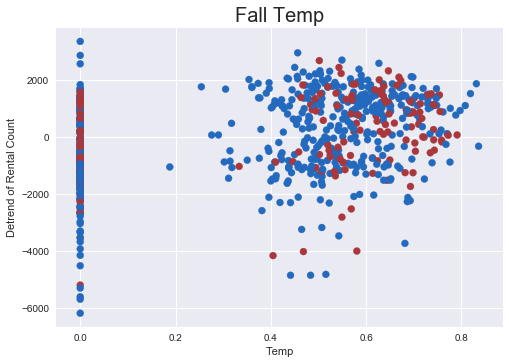

In [130]:
plt.style.use('seaborn')
plt.scatter(final_df['hum_misty'],final_df['detrend'], c=final_df['fall'], cmap='vlag')
plt.xlabel('Temp')
plt.ylabel('Detrend of Rental Count')
plt.title('Fall Temp',fontdict={'fontsize': 20})

Text(0.5, 1.0, 'Fall Temp x Humidity')

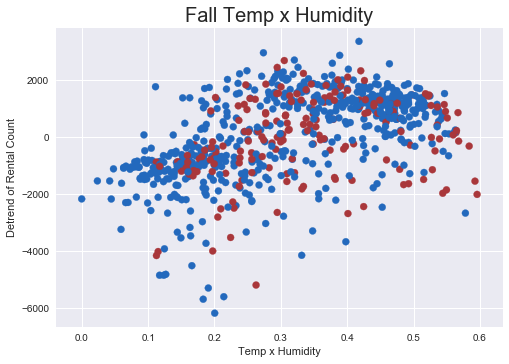

In [117]:
plt.style.use('seaborn')
plt.scatter(final_df['temp_hum'],final_df['detrend'], c=final_df['fall'], cmap='vlag')
plt.xlabel('Temp x Humidity')
plt.ylabel('Detrend of Rental Count')
plt.title('Fall Temp x Humidity',fontdict={'fontsize': 20})

In [118]:
corrtest = final_df[list(pd.DataFrame(final_model[0].pvalues).transpose().columns)[1:]]

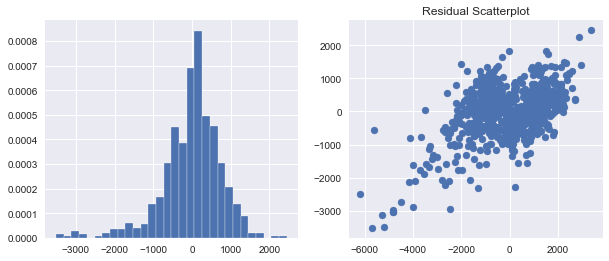

In [119]:
checkresiduals(df, 'detrend', final_model[0])

In [120]:
corrtest.corr()

,hum,clear,misty,summer,holiday_clear,holiday_summer,workingday_hum,workingday_fall,workingday_spring,workingday_summer,...,workingday_clear_summer,workingday_misty_fall,workingday_misty_spring,workingday_misty_summer,temp_hum_fall,hum_clear_fall,hum_clear_spring,hum_clear_summer,hum_misty_fall,hum_misty_spring
hum,1.000000,0.494804,-0.574041,-0.095745,0.026679,-0.014462,0.323828,0.206761,-0.046338,-0.097365,...,0.096675,-0.019693,-0.204550,-0.162573,0.316045,0.284515,0.294731,0.153552,0.002716,-0.144212
clear,0.494804,1.000000,-0.941694,-0.128409,0.127301,0.017906,0.192081,0.062744,0.043325,-0.113409,...,0.284423,-0.219777,-0.245563,-0.286557,0.075905,0.429370,0.450512,0.347770,-0.292236,-0.290952
misty,-0.574041,-0.941694,1.000000,0.152617,-0.119878,-0.014609,-0.225999,-0.105120,-0.031291,0.137888,...,-0.267840,0.233385,0.260768,0.304299,-0.126588,-0.404336,-0.424244,-0.327493,0.310330,0.308966
summer,-0.095745,-0.128409,0.152617,1.000000,-0.017903,0.090289,-0.014915,-0.258760,-0.267682,0.801832,...,0.350370,-0.178410,-0.199343,0.690276,-0.307707,-0.178246,-0.187022,0.428405,-0.237231,-0.236188
holiday_clear,0.026679,0.127301,-0.119878,-0.017903,1.000000,0.285495,-0.124332,-0.040578,-0.041977,-0.042374,...,-0.018516,-0.027978,-0.031260,-0.036479,0.028825,0.078877,-0.029328,0.035133,-0.037202,-0.037038
holiday_summer,-0.014462,0.017906,-0.014609,0.090289,0.285495,1.000000,-0.071586,-0.023363,-0.024169,-0.024398,...,-0.010661,-0.016109,-0.017999,-0.021003,-0.027783,-0.016094,-0.016886,0.086756,-0.021419,-0.021325
workingday_hum,0.323828,0.192081,-0.225999,-0.014915,-0.124332,-0.071586,1.000000,0.371944,0.267427,0.247146,...,0.170770,0.183287,0.122478,0.177250,0.123248,0.152586,0.081497,0.028260,-0.072238,-0.036293
workingday_fall,0.206761,0.062744,-0.105120,-0.258760,-0.040578,-0.023363,0.371944,1.000000,-0.205537,-0.207482,...,-0.090662,0.689483,-0.153064,-0.178616,0.749334,0.498249,-0.143604,-0.110854,0.469999,-0.181355
workingday_spring,-0.046338,0.043325,-0.031291,-0.267682,-0.041977,-0.024169,0.267427,-0.205537,1.000000,-0.214636,...,-0.093788,-0.141714,0.744701,-0.184775,-0.244417,-0.141584,0.434337,-0.114676,-0.188436,0.559824
workingday_summer,-0.097365,-0.113409,0.137888,0.801832,-0.042374,-0.024398,0.247146,-0.207482,-0.214636,1.000000,...,0.436962,-0.143055,-0.159840,0.860873,-0.246729,-0.142923,-0.149961,0.315069,-0.190219,-0.189384


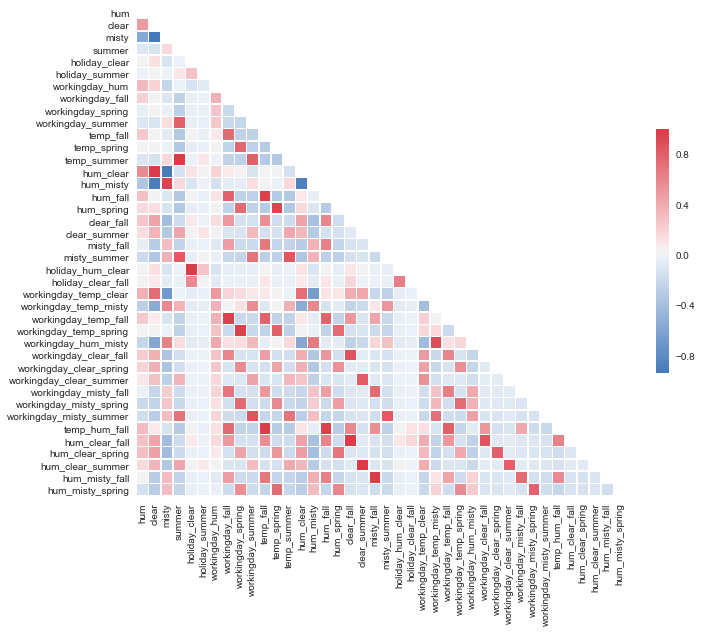

In [121]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corrtest.corr(), dropDuplicates = True)

In [122]:
df.dtypes

instant          int64
dteday           int64
season          object
yr               int64
mnth             int64
holiday          int64
weekday          int64
workingday       int64
weathersit       int64
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
weather         object
clear            uint8
light_storm      uint8
misty            uint8
fall             uint8
spring           uint8
summer           uint8
winter           uint8
trend          float64
detrend        float64
dtype: object

In [123]:
df.describe()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,cnt,clear,light_storm,misty,fall,spring,summer,winter,trend,detrend
count,730.000000,730.0,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02
mean,365.586301,719163.0,0.500000,6.515068,0.028767,3.000000,0.683562,1.393151,0.495461,0.474402,...,4510.489041,0.338356,0.027397,0.634247,0.247945,0.252055,0.252055,0.247945,4510.489041,-7.375628e-13
std,211.013951,0.0,0.500343,3.451871,0.167266,2.004795,0.465405,0.542015,0.183165,0.163068,...,1931.408300,0.473475,0.163350,0.481971,0.432116,0.434490,0.434490,0.432116,1229.537994,1.489488e+03
min,1.000000,719163.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2386.114291,-6.169551e+03
25%,183.250000,719163.0,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,...,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3448.050235,-1.001830e+03
50%,365.500000,719163.0,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499166,0.487364,...,4548.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4509.986179,1.628104e+02
75%,547.750000,719163.0,1.000000,9.750000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,...,5966.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,5571.922124,1.205429e+03
max,731.000000,719163.0,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6639.684877,3.371302e+03


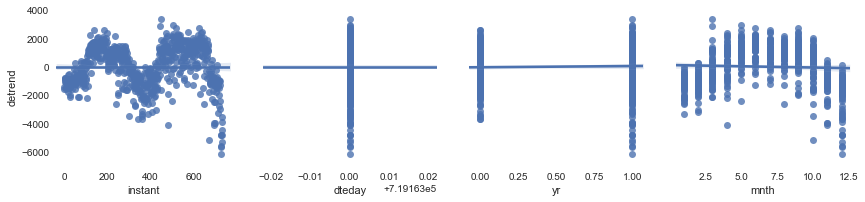

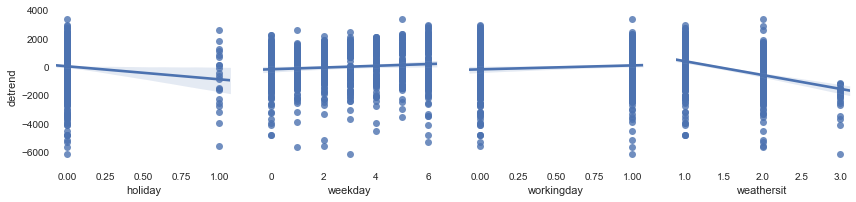

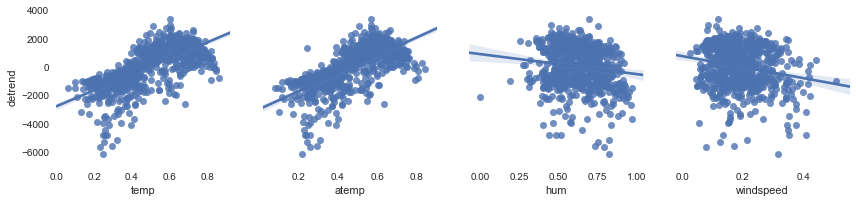

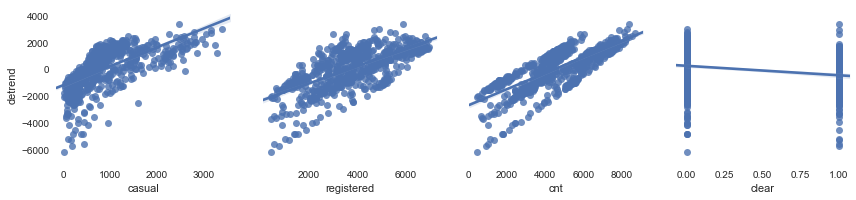

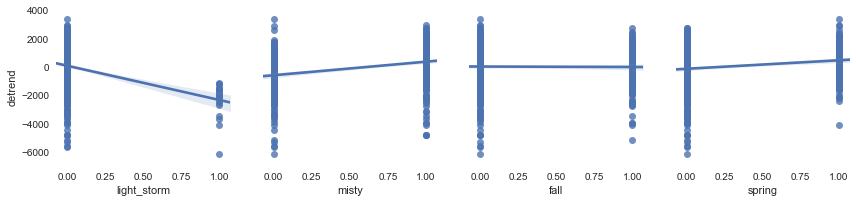

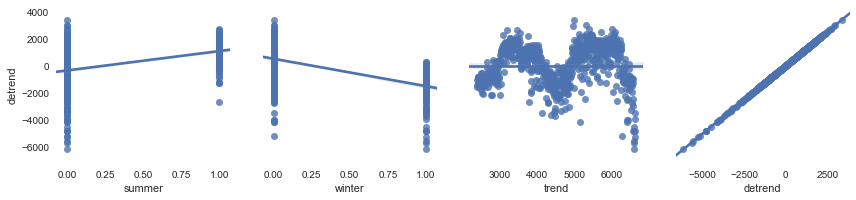

In [124]:
feats = list(df.select_dtypes(include=['int64','float64','uint8']).columns)
n = 4
row_groups= [feats[i:i+n] for i in range(0, len(feats), n)]
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['detrend'], x_vars=i, kind="reg", height=3)